# Gradient Boosting

In [61]:
import joblib
# Load them back
data = joblib.load("resampled_data.joblib")
X_train_res = data["X_train_res"]
y_train_res = data["y_train_res"]
X_test = data["X_test"]
y_test = data["y_test"] 

print("✅ Resampled data loaded successfully")

✅ Resampled data loaded successfully


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
# -----------------------------
#  Train Gradient Boosting Classifier
# -----------------------------
gb_model = GradientBoostingClassifier(
    n_estimators=300,    # number of boosting stages
    learning_rate=0.05,  # step size shrinkage
    max_depth=3,         # tree depth
    random_state=42
)

gb_model.fit(X_train_res, y_train_res)

# -----------------------------
#  Predictions & Evaluation
# -----------------------------
y_pred_test = gb_model.predict(X_test)
y_pred_train = gb_model.predict(X_train_res)

# --- Train Performance ---
print("\n=== TRAIN PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_train_res, y_pred_train))
print("Accuracy:", accuracy_score(y_train_bal, y_train_res))
print("Classification Report:\n", classification_report(y_train_res, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train))

# --- Test Performance ---
print("\n=== TEST PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


=== TRAIN PERFORMANCE ===
Balanced Accuracy: 0.9996736824930658
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       1.00      1.00      1.00      2043
         2.0       1.00      1.00      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129

Confusion Matrix:
 [[2043    0    0]
 [   0 2043    0]
 [   0    2 2041]]

=== TEST PERFORMANCE ===
Balanced Accuracy: 0.8519344447984142
Accuracy: 0.9533333333333334
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.78      0.93      0.85        86
         2.0       0.99      0.96      0.98       511

    accuracy                           0.95       600
   macro avg       0.76      0.85      0.80       600

- Model: Gradient Boosting Classifier (gb_model) builds sequential trees to correct errors.

- Train: fit() trains the model on balanced training data.

- Predict: predict() gives class labels for train and test sets.

Evaluate:

- balanced_accuracy_score → overall balanced accuracy.

- classification_report → precision, recall, f1-score per class.

- confusion_matrix → shows actual vs predicted counts.

Output: Train usually very high accuracy; test shows generalization and misclassifications.

                   Feature  Importance
0        Daily_Usage_Hours    0.596424
1          Apps_Used_Daily    0.123918
4     Time_on_Social_Media    0.084286
2     Phone_Checks_Per_Day    0.070319
3           Time_on_Gaming    0.059602
5              Sleep_Hours    0.050250
7     Academic_Performance    0.003766
8           Exercise_Hours    0.003370
6      Weekend_Usage_Hours    0.001781
17        School_Grade_Num    0.001231
12                     Age    0.001133
9        Time_on_Education    0.001043
14    Family_Communication    0.000882
11  Screen_Time_Before_Bed    0.000807
15     Social_Interactions    0.000453
10        Depression_Level    0.000360
13             Self_Esteem    0.000188
16           Anxiety_Level    0.000188


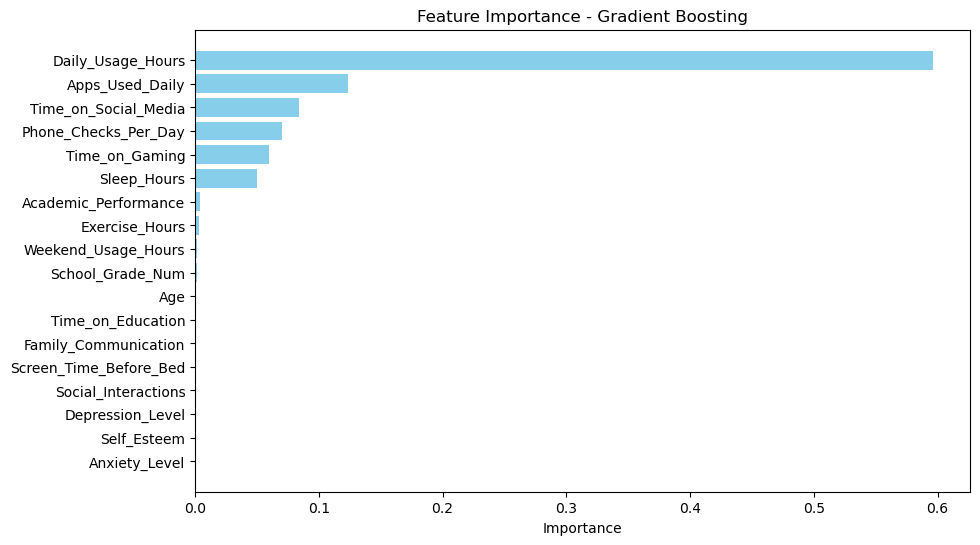

In [65]:
# Assuming your model is already trained as `gb_model`

# 1️⃣ Get feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # your training features
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 2️⃣ Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  # highest importance at the top
plt.show()

Code Explanation

- gb_model.feature_importances_ gives each feature’s contribution to reducing loss.

- The DataFrame pairs features with their importance and sorts them.

- The bar chart visualizes the importance, with longer bars = more influence.

- invert_yaxis() puts the most important features at the top.

Output

- Table: Ranks features by importance.

- Plot: Quickly shows which features drive the model most, useful for understanding the model or reducing features.

In [67]:
# Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the base model
gb_model = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=20,           # number of random combinations to try
    scoring='balanced_accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
rand_search.fit(X_train_res, y_train_res)

# Best parameters and estimator
print("Best Parameters:", rand_search.best_params_)
best_gb = rand_search.best_estimator_

# Predictions on train and test
y_pred_train = best_gb.predict(X_train_res)
y_pred_test = best_gb.predict(X_test)

# Train performance
print("\n=== TRAIN PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_train_res, y_pred_train))
print("Accuracy:", accuracy_score(y_train_res, y_pred_train))
print("Classification Report:\n", classification_report(y_train_res, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train))

# Test performance
print("\n=== TEST PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  11.9s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  12.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  12.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  12.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  12.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=  12.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   

### 1. Hyperparameter tuning

- param_distributions: Defines a range of hyperparameters for GradientBoostingClassifier (like n_estimators, learning_rate, max_depth, etc.).

- RandomizedSearchCV: Randomly tries 20 combinations from the defined parameter grid using 5-fold CV and evaluates using balanced accuracy.

- rand_search.fit(...): Trains the model on the balanced training set (X_train_bal, y_train_bal) and finds the best hyperparameters.

### 2. Best model

- rand_search.best_params_: Prints the best combination of hyperparameters found.

- best_gb = rand_search.best_estimator_: Stores the tuned Gradient Boosting model.

### 3. Predictions

- y_pred_train / y_pred_test: Predictions on train and test sets.

### 4. Evaluation

- Balanced Accuracy: Accuracy accounting for class imbalance.

- Accuracy: Standard accuracy.

- Classification Report: Precision, recall, F1-score for each class.

- Confusion Matrix: True vs predicted classes.

### Output:

- Shows train and test performance, including accuracy, class-wise metrics, and confusion matrices.

- Helps check for overfitting (train >> test) or underfitting (both low).

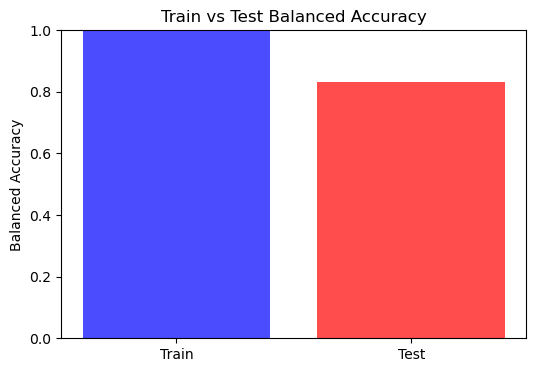

In [69]:
import matplotlib.pyplot as plt

# Balanced Accuracy values
scores = [balanced_accuracy_score(y_train_res, y_pred_train),
          balanced_accuracy_score(y_test, y_pred_test)]

labels = ['Train', 'Test']

plt.figure(figsize=(6,4))
plt.bar(labels, scores, color=['blue', 'red'], alpha=0.7)
plt.ylim(0,1)
plt.ylabel('Balanced Accuracy')
plt.title('Train vs Test Balanced Accuracy')
plt.show()

✅ Explanation:

- Blue bar → train accuracy

- Red bar → test accuracy

- Quickly shows overfitting if train >> test.

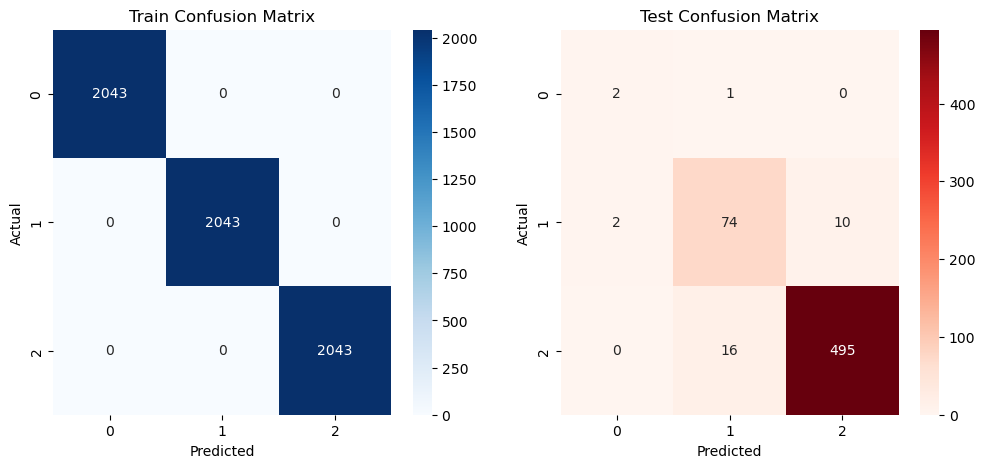

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train_res, y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Test
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

✅ Explanation:

- Left → train confusion matrix

- Right → test confusion matrix

- Highlights misclassifications for each class.

This gives both a numerical comparison (accuracy) and a class-level comparison (confusion matrices).